In [1]:
%%bash
source ~/tt-menv/bin/activate
python ./compare_confs.py > /dev/null

2024-12-19 11:14:41.635 | DEBUG    | ttnn:<module>:82 - Initial ttnn.CONFIG:
Config{cache_path=/home/bach/.cache/ttnn,model_cache_path=/home/bach/.cache/ttnn/models,tmp_dir=/tmp/ttnn,enable_model_cache=false,enable_fast_runtime_mode=true,throw_exception_on_fallback=false,enable_logging=false,enable_graph_report=false,enable_detailed_buffer_report=false,enable_detailed_tensor_report=false,enable_comparison_mode=false,comparison_mode_pcc=0.9999,root_report_path=generated/ttnn/reports,report_name=std::nullopt,std::nullopt}
2024-12-19 11:14:41.697 | WARNING  | ttnn.decorators:operation_decorator:801 - Should ttnn.pearson_correlation_coefficient be migrated to C++?
2024-12-19 11:14:41.697 | WARNING  | ttnn.decorators:operation_decorator:801 - Should ttnn.Conv1d be migrated to C++?
2024-12-19 11:14:41.697 | WARNING  | ttnn.decorators:operation_decorator:801 - Should ttnn.conv2d be migrated to C++?
2024-12-19 11:14:41.698 | WARNING  | ttnn.decorators:operation_decorator:801 - Should ttnn.unsq

In [2]:
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

results = json.load(open("./results_compare.json", "r"))
index = [str(i) for i in results.pop("mat_sizes")]
df = pd.DataFrame.from_records(data=results, index=index)
df

,bshard_HiFi_f32,bshard_LoFi_f32,hshard_HiFi_f32,progcache_bf16,progcache_f32,torch_f32,wshard_HiFi_f32
2,0.003368,0.002865,0.000222,0.000020,0.000019,0.000003,0.000200
4,0.000197,0.000186,0.000167,0.000019,0.000020,0.000003,0.000169
8,0.000196,0.000173,0.000173,0.000020,0.000020,0.000003,0.000162
16,0.000191,0.000169,0.000173,0.000020,0.000021,0.000003,0.000183
32,0.000178,0.000177,0.000174,0.000020,0.000020,0.000004,0.000156
64,0.003407,0.002932,0.000247,0.000021,0.000019,0.000018,0.000273
128,0.003499,0.003070,0.000298,0.000022,0.000021,0.000042,0.000283
256,0.003599,0.003146,0.000346,0.000031,0.000026,0.000157,0.000356
512,0.003938,0.003253,NaN,0.000050,0.000041,0.000600,NaN
1024,0.006447,0.003474,NaN,0.000055,0.000054,0.003923,NaN


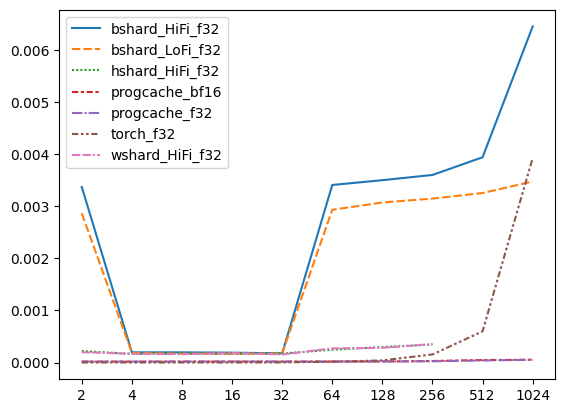

In [3]:
fig, ax = plt.subplots()
plot = sns.lineplot(df, ax=ax)
plt.show()

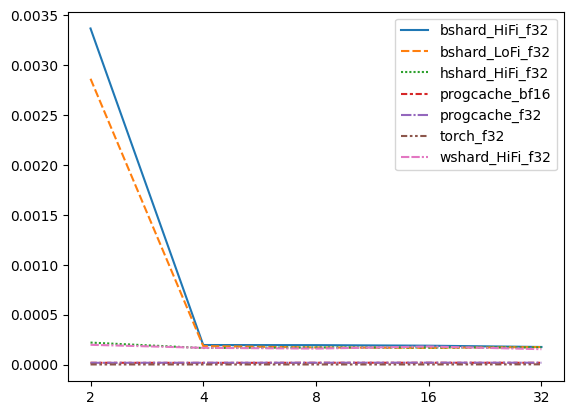

In [4]:
fig, ax = plt.subplots()
plot = sns.lineplot(df[0:5], ax=ax)
plt.show()

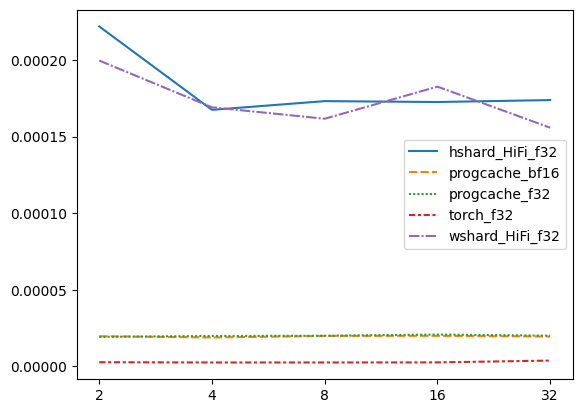

In [5]:
fig, ax = plt.subplots()
plot = sns.lineplot(df.drop(["bshard_HiFi_f32", "bshard_LoFi_f32"], axis=1)[0:5], ax=ax)
plt.show()

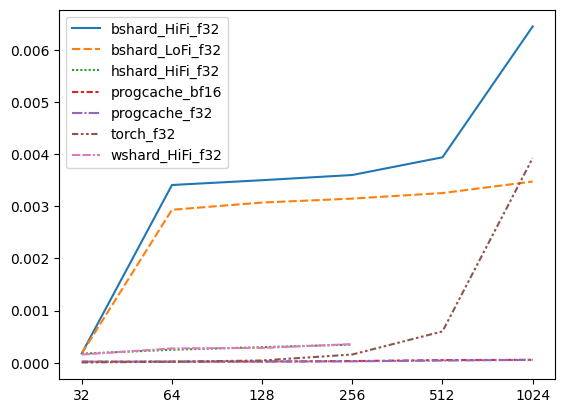

In [6]:
fig, ax = plt.subplots()
plot = sns.lineplot(df[4:], ax=ax)
plt.show()